In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import numpy and pandas libraries

In [18]:
dataset_folder = "../../dataset/"

# Oil price analysis

In [4]:
oil_df = pd.read_csv(dataset_folder + 'DCOILBRENTEU.csv')

In [5]:
oil_df #read the oil dataset and then view it

,DATE,DCOILBRENTEU
0,2015-11-02,47.91
1,2015-11-03,48.00
2,2015-11-04,46.96
3,2015-11-05,47.19
4,2015-11-06,46.09
...,...,...
1561,2021-10-26,85.11
1562,2021-10-27,84.12
1563,2021-10-28,83.4
1564,2021-10-29,83.1


In [6]:
oil_df=oil_df[oil_df.DCOILBRENTEU != '.'] #eliminate empty values

In [7]:
oil_df['DCOILBRENTEU']=oil_df['DCOILBRENTEU'].astype(np.float64) #convert the non-empty ones to float64 type

C:\Users\goodu\AppData\Local\Temp/ipykernel_10064/4199784657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oil_df['DCOILBRENTEU']=oil_df['DCOILBRENTEU'].astype(np.float64) #convert the non-empty ones to float64 type


In [8]:
oil_df['DCOILBRENTEU'].isnull().sum() #check again for NA values

0

In [9]:
print('min price of oil: ',oil_df['DCOILBRENTEU'].min())
print('max price of oil: ',oil_df['DCOILBRENTEU'].max())
print('mean price of oil: ',oil_df['DCOILBRENTEU'].mean())
print('std of price of oil: ',oil_df['DCOILBRENTEU'].std())
#print out min, max, mean, standart deviation of the whole dataset

min price of oil:  9.12
max price of oil:  86.07
mean price of oil:  56.65166121648136
std of price of oil:  14.024373374502488


Text(0, 0.5, 'Price of the oil')

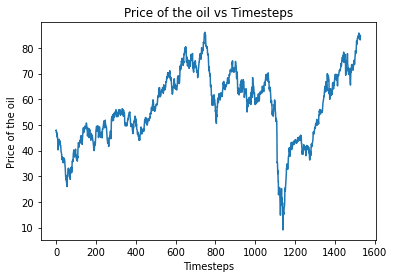

In [12]:
plt.plot(np.arange(len(oil_df['DATE'])),oil_df['DCOILBRENTEU'].values.astype(float))
plt.title('Price of the oil vs Timesteps')
plt.xlabel('Timesteps')
plt.ylabel('Price of the oil')
#plot the whole dataset

# Bitcoin price analysis

In [19]:
coin_df = pd.read_csv(dataset_folder + 'coin_Bitcoin.csv')

In [20]:
coin_df #read the Bitcoin dataset and view it

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


In [21]:
coin_df['Close'].isnull().sum() #check for NA values

0

In [22]:
date_edit = coin_df['Date'].values.tolist()
for i in range(len(date_edit)):
    date_edit[i] = date_edit[i][0:10]
coin_df['Date'] = date_edit

#Here we just keep the date information and eliminate the time information for column 'Date'

In [23]:
coin_df['Date']

0       2013-04-29
1       2013-04-30
2       2013-05-01
3       2013-05-02
4       2013-05-03
           ...    
2986    2021-07-02
2987    2021-07-03
2988    2021-07-04
2989    2021-07-05
2990    2021-07-06
Name: Date, Length: 2991, dtype: object

In [24]:
new_coin_df = coin_df[['Date','Close']]
new_coin_df #we make new datafram with just the closing values of Bitcoin on each date as we want to predict the closing prices of the dataset and then we view it

,Date,Close
0,2013-04-29,144.539993
1,2013-04-30,139.000000
2,2013-05-01,116.989998
3,2013-05-02,105.209999
4,2013-05-03,97.750000
...,...,...
2986,2021-07-02,33897.048590
2987,2021-07-03,34668.548402
2988,2021-07-04,35287.779766
2989,2021-07-05,33746.002456


In [25]:
new_coin_df['Close'] #view the closing prices column

0         144.539993
1         139.000000
2         116.989998
3         105.209999
4          97.750000
            ...     
2986    33897.048590
2987    34668.548402
2988    35287.779766
2989    33746.002456
2990    34235.193451
Name: Close, Length: 2991, dtype: float64

In [26]:
print('min price of Bitcoin: ',new_coin_df['Close'].min())
print('max price of Bitcoin: ',new_coin_df['Close'].max())
print('mean price of Bitcoin: ',new_coin_df['Close'].mean())
print('std of price of Bitcoin: ',new_coin_df['Close'].std())
#print out min, max, mean, standart deviation of the whole dataset

min price of Bitcoin:  68.43099975585938
max price of Bitcoin:  63503.45793019
mean price of Bitcoin:  6711.290443071488
std of price of Bitcoin:  11298.141921403469


Text(0, 0.5, 'Price of the Bitcoin')

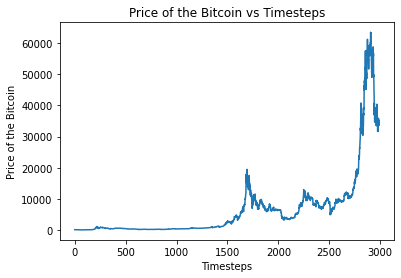

In [27]:
plt.plot(np.arange(len(new_coin_df['Date'])),new_coin_df['Close'].values.astype(float))
plt.title('Price of the Bitcoin vs Timesteps')
plt.xlabel('Timesteps')
plt.ylabel('Price of the Bitcoin')
#plot the whole dataset